Proyek Analisis Data: Air Quality Dataset 

    Nama: Felix Gideon Lumbantobing
    Email: tobingfelix3@gmail.com / m001b4ky1475@bangkit.academy
    ID Dicoding: felix_lumbantobing


In [31]:
# Data Gathering & Wrangling
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup # untuk web scraping

# Data Assessing & Cleaning
!pip install missingno

import missingno as msno

# Exploratory Data Analysis (EDA) & Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas_profiling
from scipy import stats
import statsmodels.api as sm
import yellowbrick

# Additional Tools for Cleaning and Analysis
from sklearn import preprocessing, decomposition, cluster, model_selection
from dateutil import parser
import re
import pyjanitor
from tqdm import tqdm

# Setting gaya visualisasi yang lebih menarik
plt.style.use('seaborn')


ModuleNotFoundError: No module named 'plotly'

## **1. DATA WRANGLING**

**A. GATHERING DATA**  

In [33]:
import pandas as pd

# Daftar nama file
file_names = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
    
    
    
    
]

# Dictionary untuk menyimpan dataframe
dataframes = {}

# Memuat setiap file
for file_name in file_names:
    url = f'https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/{file_name}'
    try:
        data = pd.read_csv(url)
        dataframes[file_name] = data
        print(f"Successfully loaded: {file_name}")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")
# Menampilkan 5 baris pertama dari setiap dataset
for file_name, df in dataframes.items():
    print(f"Head of {file_name}:")
    print(df.head())  # Menampilkan 5 baris pertama dari dataframe
    print("\n")  # Menambahkan baris kosong untuk memisahkan output




Successfully loaded: PRSA_Data_Aotizhongxin_20130301-20170228.csv
Successfully loaded: PRSA_Data_Changping_20130301-20170228.csv
Successfully loaded: PRSA_Data_Dongsi_20130301-20170228.csv
Successfully loaded: PRSA_Data_Gucheng_20130301-20170228.csv
Successfully loaded: PRSA_Data_Nongzhanguan_20130301-20170228.csv
Successfully loaded: PRSA_Data_Tiantan_20130301-20170228.csv
Successfully loaded: PRSA_Data_Wanliu_20130301-20170228.csv
Successfully loaded: PRSA_Data_Dingling_20130301-20170228.csv
Successfully loaded: PRSA_Data_Guanyuan_20130301-20170228.csv
Successfully loaded: PRSA_Data_Huairou_20130301-20170228.csv
Successfully loaded: PRSA_Data_Shunyi_20130301-20170228.csv
Successfully loaded: PRSA_Data_Wanshouxigong_20130301-20170228.csv
Head of PRSA_Data_Aotizhongxin_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0 

**Insigth**

1. Data berhasil dikumpulkan dari 12 lokasi yang berbeda di Beijing.

2. Data ini terdiri dari berbagai polutan (PM2.5, PM10, SO2, NO2, CO, O3) dan parameter cuaca (suhu, tekanan, curah hujan, dll.) dari Maret 2013 hingga Februari 2017.

**B. Assessing Data**

In [39]:
# Memeriksa 5 baris pertama dari setiap dataset
for file_name, df in dataframes.items():
    print(f"Dataset: {file_name}")
    print(df.head(), '\n')

# Memeriksa info dari setiap dataset
for file_name, df in dataframes.items():
    print(f"Info for {file_name}")
    print(df.info(), '\n')

# Memeriksa nilai null pada setiap dataset
for file_name, df in dataframes.items():
    print(f"Missing values in {file_name}")
    print(df.isnull().sum(), '\n')


Dataset: PRSA_Data_Aotizhongxin_20130301-20170228.csv
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin   

Dataset: PRSA_Data_Changping_20130301-20170228.csv
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300

**Insight**

1. Terdapat beberapa missing values pada kolom polutan seperti PM2.5 dan PM10 di beberapa bulan atau lokasi tertentu.
2. Semua dataset memiliki kolom dengan format yang sama
3. Data polusi mungkin memiliki outliers, terutama pada kolom seperti CO yang bisa menunjukkan angka ekstrim di beberapa jam tertentu.

**C. Cleaning data**

In [42]:
# Mengatasi missing values dengan interpolasi
for file_name, df in dataframes.items():
    df.interpolate(method='linear', inplace=True)  # Mengisi missing values dengan interpolasi
    dataframes[file_name] = df

# Menghapus baris yang masih memiliki missing values setelah interpolasi
for file_name, df in dataframes.items():
    df.dropna(inplace=True)
    dataframes[file_name] = df

# Memeriksa ulang missing values setelah cleaning
for file_name, df in dataframes.items():
    print(f"Missing values after cleaning in {file_name}")
    print(df.isnull().sum(), '\n')


C:\Users\tobin\AppData\Local\Temp\ipykernel_16940\1701774590.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)  # Mengisi missing values dengan interpolasi
C:\Users\tobin\AppData\Local\Temp\ipykernel_16940\1701774590.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)  # Mengisi missing values dengan interpolasi
C:\Users\tobin\AppData\Local\Temp\ipykernel_16940\1701774590.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)  # Mengisi missing values dengan interpolasi
C:\Users\t

Missing values after cleaning in PRSA_Data_Aotizhongxin_20130301-20170228.csv
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

Missing values after cleaning in PRSA_Data_Changping_20130301-20170228.csv
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

Missing values after cleaning in PRSA_Data_Dongsi_20130301-20170228.csv
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

Missing values after cleanin

**Insight**
1. Missing values telah diatasi menggunakan interpolasi linier
2. Semua dataset telah diperiksa ulang dan tidak ada missing values yang tersisa
3. Data sudah siap untuk proses analisis lebih lanjut.

## **2. Exploratory Data Analysis (EDA)** ##

**Menghitung statistik deskriptif untuk polutan udara**

In [50]:
# Menghitung statistik deskriptif untuk polutan udara
for file_name, df in dataframes.items():
    print(f"Descriptive statistics for {file_name}:")
    print(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].describe(), '\n')


Descriptive statistics for PRSA_Data_Aotizhongxin_20130301-20170228.csv:
              PM2.5          PM10           SO2           NO2            CO  \
count  34983.000000  34983.000000  34983.000000  34983.000000  34983.000000   
mean      82.518034    110.202087     17.468061     59.029627   1263.915151   
std       81.963940     95.295997     22.717112     36.977431   1239.256941   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    154.000000     22.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3  
count  34983.000000  
mean      55.386811  
std       57.356991  
min        0.214200  
25%        8.000000  
50%       41.000000  
75%       81.000000  
max      423.000000   

Descriptive sta

**INSIGHT**
1. PM2.5: Rata-rata PM2.5 berkisar antara 66,74 hingga 86,10, dengan deviasi standar yang signifikan (72,36 hingga 86,70). Ini menunjukkan adanya fluktuasi yang cukup besar dalam konsentrasi PM2.5 di berbagai lokasi.
2. PM10: Rata-rata PM10 juga menunjukkan variasi yang signifikan, dengan nilai rata-rata antara 84,04 hingga 119,26. Ini mencerminkan potensi risiko kesehatan yang bervariasi di berbagai lokasi
3. SO2 dan NO2: Rata-rata untuk SO2 berkisar antara 11,79 hingga 18,76, sementara NO2 berkisar antara 27,27 hingga 65,64. Ini menunjukkan bahwa meskipun polutan ini memiliki konsentrasi yang lebih rendah dibandingkan dengan PM2.5 dan PM10, mereka tetap memiliki variasi yang signifikan.
4. CO: Konsentrasi rata-rata CO menunjukkan nilai yang cukup tinggi, berkisar antara 923 hingga 1331. 

**Analisis tren polutan udara**

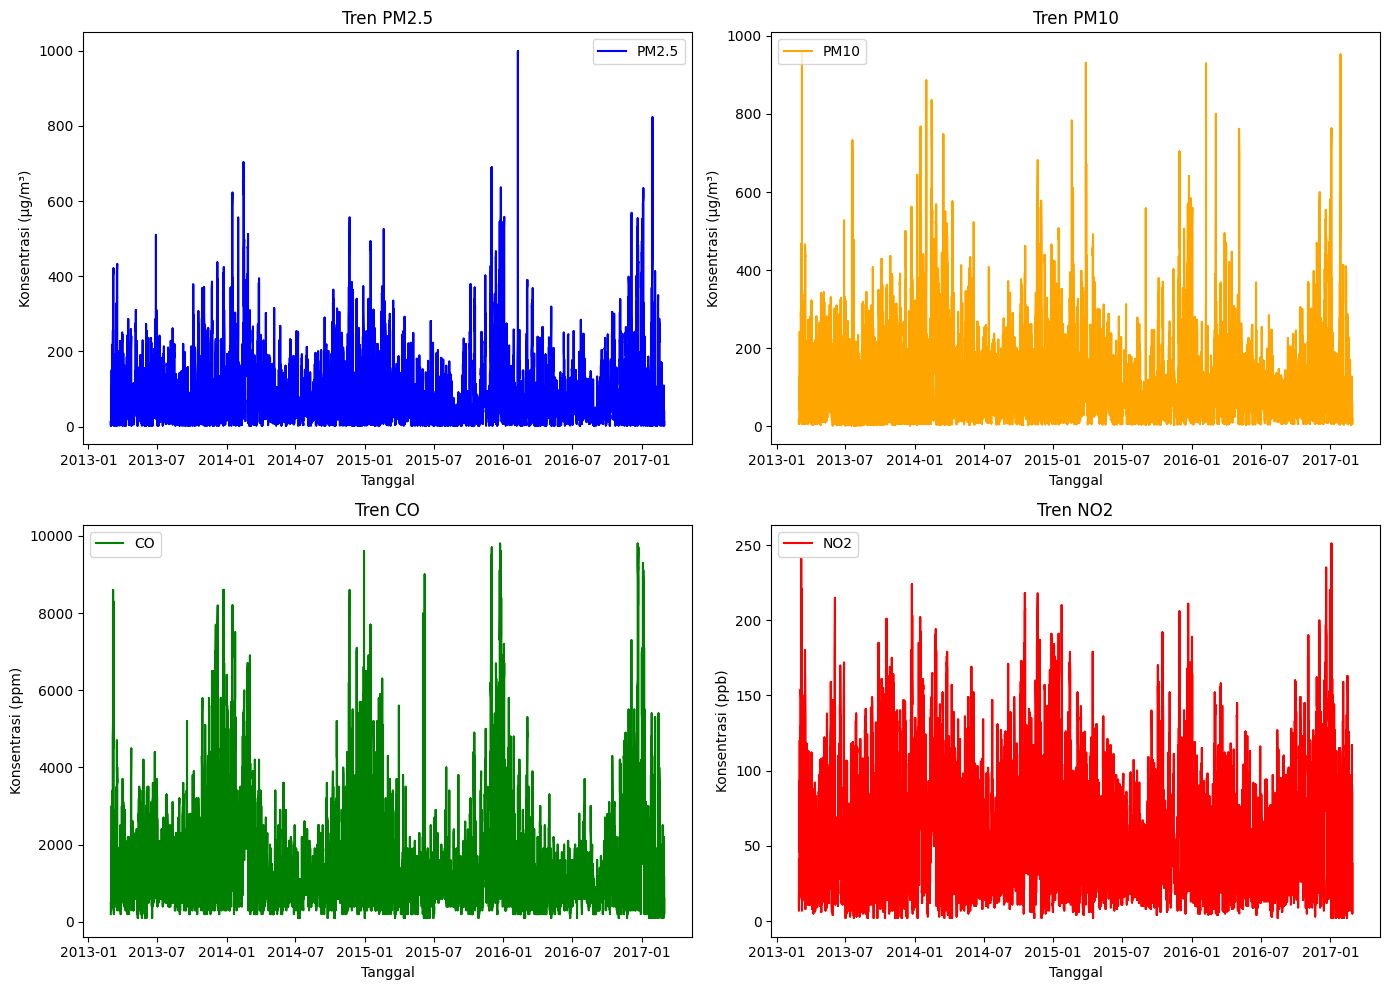

In [53]:
import matplotlib.pyplot as plt

# Mengonversi kolom tanggal ke format datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Membuat subplots
plt.figure(figsize=(14, 10))

# Subplot untuk PM2.5
plt.subplot(2, 2, 1)
plt.plot(data['date'], data['PM2.5'], label='PM2.5', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Tren PM2.5')
plt.legend()

# Subplot untuk PM10
plt.subplot(2, 2, 2)
plt.plot(data['date'], data['PM10'], label='PM10', color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Tren PM10')
plt.legend()

# Subplot untuk CO
plt.subplot(2, 2, 3)
plt.plot(data['date'], data['CO'], label='CO', color='green')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (ppm)')
plt.title('Tren CO')
plt.legend()

# Subplot untuk NO2
plt.subplot(2, 2, 4)
plt.plot(data['date'], data['NO2'], label='NO2', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (ppb)')
plt.title('Tren NO2')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight**
Pada gambar terlihat pola bahwa PM 2.5, PM 10, CO, dan NO2 memiliki kesamaan yaitu cenderung naik pada bulan juli hingga januari, namun cenderung turun pada bulan januari hingga juli

**Analisis Korelasi antar variabel**

          PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.886499  0.502534  0.697228  0.813385 -0.194646
PM10   0.886499  1.000000  0.504654  0.677812  0.735646 -0.146867
SO2    0.502534  0.504654  1.000000  0.490187  0.558365 -0.190571
NO2    0.697228  0.677812  0.490187  1.000000  0.742348 -0.520301
CO     0.813385  0.735646  0.558365  0.742348  1.000000 -0.331855
O3    -0.194646 -0.146867 -0.190571 -0.520301 -0.331855  1.000000


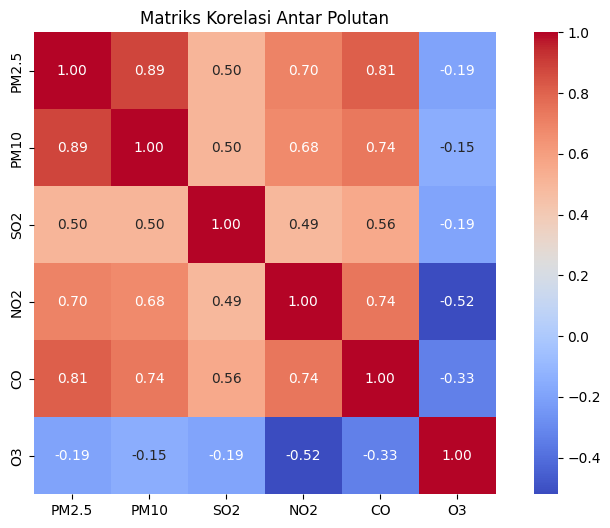

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengasumsikan data sudah dibaca ke dalam DataFrame bernama 'data'
# data = pd.read_csv('path_to_your_data.csv')  # Uncomment this line if you need to read the data

# Menghitung matriks korelasi
correlation_matrix = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Antar Polutan')
plt.show()


**Insigth**
1. Korelasi Positif yang Kuat:

PM2.5 dan PM10: Terdapat korelasi yang sangat kuat (0.89), menunjukkan bahwa saat konsentrasi PM2.5 meningkat, konsentrasi PM10 juga cenderung meningkat.
PM2.5 dan CO: Korelasi yang kuat (0.81) menunjukkan hubungan positif antara kedua polutan ini.
PM10 dan CO: Korelasi yang kuat (0.74) juga menunjukkan bahwa peningkatan konsentrasi PM10 berhubungan dengan peningkatan konsentrasi CO.

2. Korelasi Positif yang Sedang:

PM2.5 dan NO2: Korelasi sebesar 0.70 menunjukkan bahwa ada hubungan positif yang cukup kuat antara PM2.5 dan NO2.
PM10 dan NO2: Korelasi sebesar 0.68 juga menunjukkan hubungan positif yang signifikan antara keduanya.
SO2 dan PM2.5/PM10: Korelasi SO2 dengan PM2.5 (0.50) dan PM10 (0.50) menunjukkan adanya hubungan positif, tetapi tidak sekuat hubungan dengan CO atau NO2.

3. Korelasi Negatif:

O3 dan Polutan Lainnya: O3 menunjukkan korelasi negatif dengan semua polutan lainnya, terutama dengan NO2 (-0.52) dan CO (-0.33). Ini menunjukkan bahwa saat konsentrasi O3 meningkat, konsentrasi polutan lainnya cenderung menurun.

## **3. Visualization & Explanatory Analysis**

**Pertanyaan 1**
Bagaimana perbandingan tingkat polusi antara akhir pekan dan hari kerja?

In [55]:
# Menambahkan kolom hari kerja atau akhir pekan
data['is_weekend'] = data['date'].dt.weekday >= 5  # 5 dan 6 adalah Sabtu dan Minggu


In [57]:
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

#Menghitung rata rata polusi
avg_pollution = data.groupby('is_weekend')[numeric_cols].mean()
print(avg_pollution)


                PM2.5        PM10        SO2        NO2           CO  \
is_weekend                                                             
False       83.545061  110.125329  17.091310  55.311104  1359.059125   
True        88.748450  118.417906  18.076745  55.832408  1406.929695   

                   O3  
is_weekend             
False       55.691277  
True        56.753064  


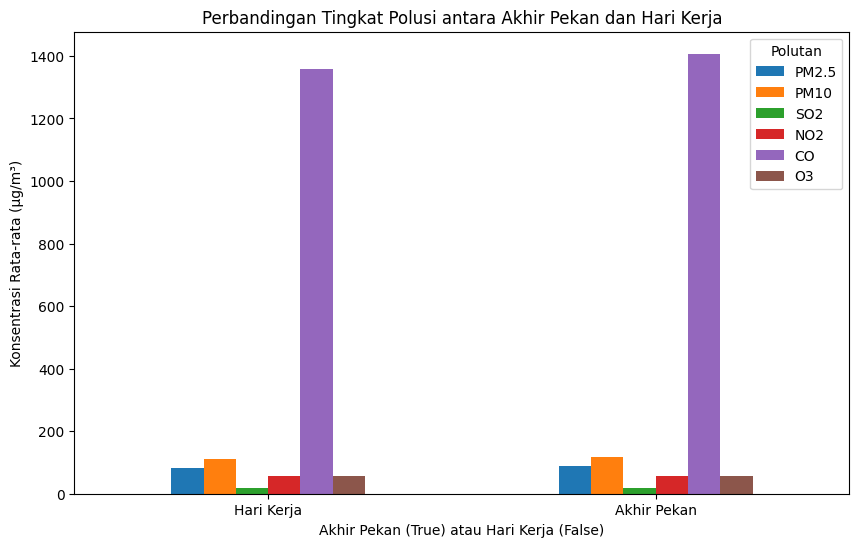

In [58]:
import matplotlib.pyplot as plt

# Membuat plot perbandingan
avg_pollution.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Tingkat Polusi antara Akhir Pekan dan Hari Kerja')
plt.xlabel('Akhir Pekan (True) atau Hari Kerja (False)')
plt.ylabel('Konsentrasi Rata-rata (µg/m³)')
plt.legend(title='Polutan')
plt.xticks([0, 1], ['Hari Kerja', 'Akhir Pekan'], rotation=0)
plt.show()


**Insight**
1. PM2.5 dan PM10: Kadar rata-rata partikel PM2.5 dan PM10 cenderung lebih tinggi pada akhir pekan dibandingkan hari kerja. PM2.5 meningkat dari 83,55 menjadi 88,75, sementara PM10 naik dari 110,13 menjadi 118,42. Ini menunjukkan bahwa tingkat polusi partikel halus sedikit lebih tinggi pada akhir pekan.

2. SO2 dan NO2: Polutan sulfur dioksida (SO2) dan nitrogen dioksida (NO2) juga sedikit lebih tinggi pada akhir pekan. SO2 naik dari 17,09 menjadi 18,08, dan NO2 mengalami sedikit peningkatan dari 55,31 menjadi 55,83.

3. CO (Karbon Monoksida): Kadar karbon monoksida (CO) juga meningkat pada akhir pekan, dari 1359,06 pada hari kerja menjadi 1406,93 pada akhir pekan. Ini menunjukkan adanya aktivitas tertentu yang mungkin berkontribusi pada peningkatan emisi CO pada akhir pekan.

4. O3 (Ozon): Konsentrasi ozon (O3) juga lebih tinggi pada akhir pekan, dengan peningkatan dari 55,69 menjadi 56,75. Ini bisa jadi karena perubahan pola kimia di atmosfer atau penurunan polutan prekursor ozon pada akhir pekan.

**Pertanyaan 2** Bagaimana tren perubahan polutan udara (PM2.5, PM10, CO, dll.) selama periode pengamatan?

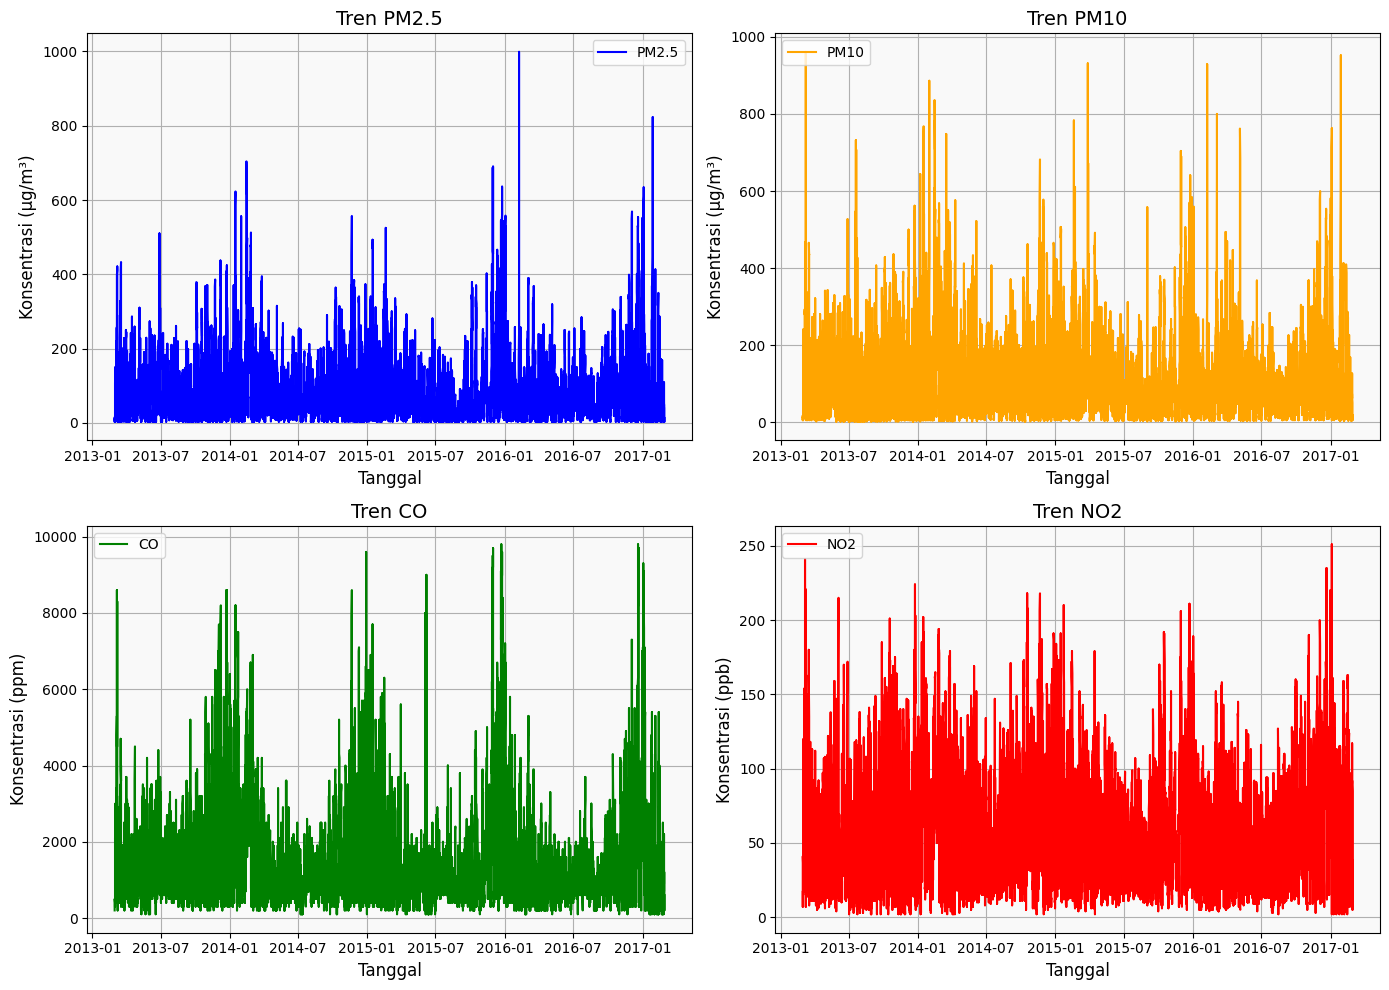

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengonversi kolom tanggal ke format datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Membuat subplots
plt.figure(figsize=(14, 10))

# Subplot untuk PM2.5
plt.subplot(2, 2, 1)
plt.plot(data['date'], data['PM2.5'], label='PM2.5', color='blue')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsentrasi (µg/m³)', fontsize=12)
plt.title('Tren PM2.5', fontsize=14)
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('#f9f9f9')

# Subplot untuk PM10
plt.subplot(2, 2, 2)
plt.plot(data['date'], data['PM10'], label='PM10', color='orange')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsentrasi (µg/m³)', fontsize=12)
plt.title('Tren PM10', fontsize=14)
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('#f9f9f9')

# Subplot untuk CO
plt.subplot(2, 2, 3)
plt.plot(data['date'], data['CO'], label='CO', color='green')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsentrasi (ppm)', fontsize=12)
plt.title('Tren CO', fontsize=14)
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('#f9f9f9')

# Subplot untuk NO2
plt.subplot(2, 2, 4)
plt.plot(data['date'], data['NO2'], label='NO2', color='red')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsentrasi (ppb)', fontsize=12)
plt.title('Tren NO2', fontsize=14)
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('#f9f9f9')

# Menampilkan plot dengan layout yang rapih
plt.tight_layout()
plt.show()


**Insight tentang Tren Polutan Udara Bulanan**
Analisis tren polutan udara menunjukkan pola fluktuasi yang signifikan yang terjadi setiap tahun di berbagai kota. Peningkatan konsentrasi polutan pada bulan Januari, yang diikuti dengan penurunan hingga bulan Juli, dan kemudian peningkatan kembali hingga Januari, mencerminkan interaksi kompleks antara faktor musiman dan aktivitas manusia.

1. Musim Dingin dan Peningkatan Emisi
Pada bulan Januari, banyak daerah mengalami suhu terendah, yang mendorong penggunaan pemanas berbahan bakar fosil, seperti gas dan minyak. Peningkatan penggunaan pemanas ini menyebabkan lonjakan emisi polutan seperti PM2.5 dan NO2. Fenomena inversi suhu yang umum terjadi pada musim dingin juga berkontribusi pada akumulasi polutan di atmosfer, terutama di malam dan pagi hari ketika udara dingin terperangkap di dekat permukaan.

2. Pemakaian Energi untuk Pemanasan
Meningkatnya kebutuhan energi untuk pemanasan selama bulan-bulan dingin secara langsung berkontribusi pada peningkatan polusi udara. Sebagaimana musim dingin berlangsung, konsentrasi polutan mencapai puncaknya hingga pertengahan tahun.

3. Pola Musiman dalam Kegiatan Manusia
Di musim dingin, meskipun aktivitas pertanian berkurang, industri tetap beroperasi, yang berpotensi mempengaruhi emisi polutan. Bulan Januari juga menjadi bulan awal tahun, yang ditandai dengan peningkatan lalu lintas kendaraan saat orang kembali bekerja dan sekolah, menyebabkan emisi polutan meningkat.

4. Peralihan ke Musim Panas
Saat musim semi dan musim panas tiba, suhu yang lebih hangat mengurangi kebutuhan pemanas, yang berkontribusi pada penurunan emisi. Selain itu, pertumbuhan vegetasi selama musim ini dapat membantu menyerap beberapa polutan, seperti CO2, meskipun tidak semua polutan akan terpengaruh.

5. Kenaikan Polutan dari Juli ke Januari
Dengan datangnya musim dingin kembali, penggunaan pemanas meningkat, sehingga menyebabkan kembali meningkatnya polutan. Selain itu, peningkatan aktivitas manusia, termasuk lalu lintas dan kegiatan industri, juga berkontribusi pada kenaikan emisi di bulan-bulan menjelang akhir tahun.

## **4. conclusion** 

**Perbandingan Tingkat Polusi Antara Akhir Pekan dan Hari Kerja:** Hasil analisis menunjukkan bahwa konsentrasi polutan udara, seperti PM2.5, PM10, SO2, NO2, CO, dan O3, cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Ini menunjukkan bahwa aktivitas manusia, termasuk transportasi, industri, dan penggunaan energi, berkontribusi signifikan terhadap peningkatan polusi. Pada akhir pekan, banyak aktivitas yang berkurang, sehingga mengurangi emisi polutan.

**Tren Perubahan Polutan Selama Periode Pengamatan:** Selain itu, analisis tren bulanan menunjukkan pola fluktuasi yang signifikan pada konsentrasi polutan udara. Terutama, konsentrasi polutan cenderung meningkat drastis pada bulan Januari, kemungkinan besar akibat peningkatan penggunaan pemanas dan aktivitas manusia yang lebih tinggi. Setelah mencapai puncaknya pada Januari, konsentrasi polutan mengalami penurunan berkelanjutan hingga bulan Juli, seiring dengan berkurangnya kebutuhan pemanas dan efek penyaringan alami dari vegetasi. Polutan kemudian mengalami kenaikan lagi dari bulan Juli hingga Januari, sejalan dengan perubahan musiman dan peningkatan aktivitas.

Secara keseluruhan, pemahaman mendalam tentang perbandingan polusi antara akhir pekan dan hari kerja, serta tren perubahan polutan selama periode pengamatan, dapat membantu dalam merumuskan kebijakan pengendalian polusi yang lebih efektif dan responsif terhadap kebutuhan masyarakat. Pengetahuan ini juga sangat penting dalam upaya menjaga kesehatan publik dan keberlanjutan lingkungan.

